In [1]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('水生根茎类全部数据.xlsx')

# 将销售日期列从字符串转换为日期时间对象
df['销售日期'] = pd.to_datetime(df['销售日期'], format='%Y年%m月%d日')

In [2]:
df.head()

销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售  \
0 2020-07-01  09:22:21.264  102900005118824   0.251        10.0   销售      否   
1 2020-07-01  09:25:45.811  102900005118824   0.711        10.0   销售      否   
2 2020-07-01  09:46:33.204  102900051000944   0.545        39.8   销售      否   
3 2020-07-01  11:01:24.263  102900005118824   0.291        10.0   销售      否   
4 2020-07-01  11:02:04.655  102900005118824   0.361        10.0   销售      否   

    单品名称        分类编码   分类名称     交易额  
0  高瓜(1)  1011010402  水生根茎类   2.510  
1  高瓜(1)  1011010402  水生根茎类   7.110  
2   洪湖藕带  1011010402  水生根茎类  21.691  
3  高瓜(1)  1011010402  水生根茎类   2.910  
4  高瓜(1)  1011010402  水生根茎类   3.610

In [3]:
df.info

<bound method DataFrame.info of             销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
0     2020-07-01  09:22:21.264  102900005118824   0.251        10.0   销售   
1     2020-07-01  09:25:45.811  102900005118824   0.711        10.0   销售   
2     2020-07-01  09:46:33.204  102900051000944   0.545        39.8   销售   
3     2020-07-01  11:01:24.263  102900005118824   0.291        10.0   销售   
4     2020-07-01  11:02:04.655  102900005118824   0.361        10.0   销售   
...          ...           ...              ...     ...         ...  ...   
58642 2023-06-30  20:59:49.903  102900005118824   0.483         8.0   销售   
58643 2023-06-30  21:01:05.528  102900011001691   0.079        14.0   销售   
58644 2023-06-30  21:04:31.769  102900051000944   0.312        13.0   销售   
58645 2023-06-30  21:21:19.697  102900011032732   0.228        10.8   销售   
58646 2023-06-30  21:22:36.386  102900005116899   0.664         8.0   销售   

      是否打折销售   单品名称        分类编码   分类名称      交易额  
0    

In [4]:
# 按照日期和单品编码分组并计算销量的总和
result = df.groupby(['销售日期', '单品编码'])['销量(千克)'].sum().reset_index()

In [5]:
result.head()

销售日期             单品编码  销量(千克)
0 2020-07-01  102900005118824   4.119
1 2020-07-01  102900051000944   0.731
2 2020-07-02  102900005118824   4.342
3 2020-07-02  102900051000944   0.258
4 2020-07-03  102900005118824   9.572

In [6]:
result.info

<bound method DataFrame.info of            销售日期             单品编码  销量(千克)
0    2020-07-01  102900005118824   4.119
1    2020-07-01  102900051000944   0.731
2    2020-07-02  102900005118824   4.342
3    2020-07-02  102900051000944   0.258
4    2020-07-03  102900005118824   9.572
...         ...              ...     ...
3205 2023-06-30  102900011001691   3.396
3206 2023-06-30  102900011007969   0.721
3207 2023-06-30  102900011018132   0.231
3208 2023-06-30  102900011032732   0.512
3209 2023-06-30  102900051000944   4.339

[3210 rows x 3 columns]>

In [7]:
# 将结果保存到新的Excel文件中
result.to_excel('result_shuishenggenjinglei.xlsx', index=False)

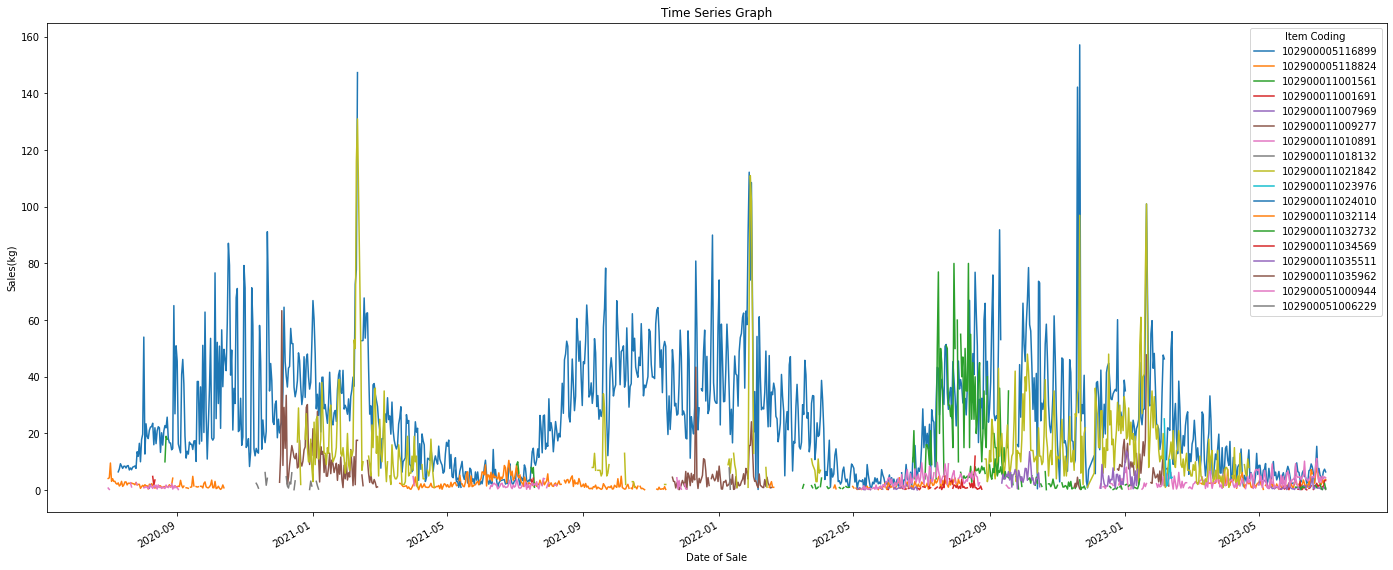

In [8]:
import matplotlib.pyplot as plt 

# 使用pivot函数将数据重新排列，以便每种单品编码成为列
pivot_result = result.pivot(index='销售日期', columns='单品编码', values='销量(千克)')

# 绘制时间序列图
pivot_result.plot(figsize=(24, 10))  # 设置图形大小
plt.title('Time Series Graph')
plt.xlabel('Date of Sale')
plt.ylabel('Sales(kg)')
plt.legend(title='Item Coding')
plt.grid(False)

# 显示图形
plt.show()